# MuCaGEx

In [1]:
from config import exp_config
from load import *
import report as report

## Init
* Start the report
* Load the model 
* Load the datasets

In [2]:
#report.config(exp_config)

#report.out("____Loading_Datasets_Info__________".ljust(55,'_'))
for d in exp_config["datasets"]:
    pass
    #report.out("Datasets$"+get_dsconfig(d)["id"])
datasets=list(map(load_dataset,exp_config["datasets"]))

#report.out("____Loading_Sesion_and_Model__________".ljust(55,'_'))
#report.out("Model$"+get_mconfig(exp_config["model"])["id"])
model=load_model(exp_config["model"])

## Tensor Modeloid Attributes

In [3]:
model.iters

0

In [4]:
model.input

OrderedDict([('epic2018',
              (<tf.Tensor 'HRBM/t_input_epic2018/in_ph_epic2018:0' shape=(12, ?, 384, 128, 8) dtype=float32>,
               <tf.Tensor 'HRBM/t_input_epic2018/len_ph_epic2018:0' shape=(12,) dtype=float32>)),
             ('melody2018',
              (<tf.Tensor 'HRBM/t_input_melody2018/in_ph_melody2018:0' shape=(12, ?, 384, 128, 1) dtype=float32>,
               <tf.Tensor 'HRBM/t_input_melody2018/len_ph_melody2018:0' shape=(12,) dtype=float32>))])

In [5]:
model.output

{('epic2018',): [('epic2018',
   'input',
   <tf.Tensor 'HRBM/t_input_epic2018/Floor:0' shape=(12, ?, 384, 128, 8) dtype=float32>),
  ('epic2018',
   'sample',
   <tf.Tensor 'HRBM/sample_epic2018/transpose:0' shape=(12, ?, 384, 128, 8) dtype=float32>)],
 ('melody2018',): [('melody2018',
   'input',
   <tf.Tensor 'HRBM/t_input_melody2018/Floor:0' shape=(12, ?, 384, 128, 1) dtype=float32>),
  ('melody2018',
   'sample',
   <tf.Tensor 'HRBM/sample_melody2018/transpose:0' shape=(12, ?, 384, 128, 1) dtype=float32>)]}

In [6]:
model.losses

{('epic2018',): [('epic2018_8_W',
   <tf.Tensor 'HRBM/Sum_24:0' shape=() dtype=float32>),
  ('epic2018_8_bv', <tf.Tensor 'HRBM/Sum_25:0' shape=() dtype=float32>),
  ('epic2018_8_bh', <tf.Tensor 'HRBM/Sum_26:0' shape=() dtype=float32>)],
 ('melody2018',): [('melody2018_1_W',
   <tf.Tensor 'HRBM/Sum_30:0' shape=() dtype=float32>),
  ('melody2018_1_bv', <tf.Tensor 'HRBM/Sum_31:0' shape=() dtype=float32>),
  ('melody2018_1_bh', <tf.Tensor 'HRBM/Sum_32:0' shape=() dtype=float32>)]}

In [7]:
model.optimizers

{('epic2018',): [(0,
   <tf.Tensor 'HRBM/optimizers_epic2018_8/AssignAdd:0' shape=(49152, 126) dtype=float32_ref>),
  (0,
   <tf.Tensor 'HRBM/optimizers_epic2018_8/AssignAdd_1:0' shape=(1, 49152) dtype=float32_ref>),
  (0,
   <tf.Tensor 'HRBM/optimizers_epic2018_8/AssignAdd_2:0' shape=(1, 126) dtype=float32_ref>)],
 ('melody2018',): [(0,
   <tf.Tensor 'HRBM/optimizers_melody2018_1/AssignAdd:0' shape=(49152, 126) dtype=float32_ref>),
  (0,
   <tf.Tensor 'HRBM/optimizers_melody2018_1/AssignAdd_1:0' shape=(1, 49152) dtype=float32_ref>),
  (0,
   <tf.Tensor 'HRBM/optimizers_melody2018_1/AssignAdd_2:0' shape=(1, 126) dtype=float32_ref>)]}

In [8]:
model.savers

{'RBM_epic2018': <tensorflow.python.training.saver.Saver at 0x7f2118cf0dd8>,
 'RBM_melody2018': <tensorflow.python.training.saver.Saver at 0x7f2118a9ca58>}

## Training

In [11]:
for e in range(exp_config['epochs']):
    epoch = e+1
    print(epoch)
    #report.new_epoch(epoch)
    ds = []
    for d in datasets:
        if d.epochs < epoch:
            ds.append(d)
            
    while ds:
        instance = {}
        for d in ds:
            instance[d.id] = d.next_instance("train")

        if exp_config['freq']['losses?'](model.iters):
            losses = model.loss(instance)
            report.save_losses(losses,model.iters)
        
        if exp_config['freq']['sampling?'](model.iters):
            samples = model.sample(instance)
            report.save_samples(samples,model.iters)
            
        if exp_config['freq']['saving?'](model.iters):
            model.save()
            report.save_model(model.iters)
            
        if exp_config['freq']['training?'](model.iters) and model.iters!=0:
            model.train(instance)
            report.save_train(instance,model.iters)
                    
        model.iters+=1

        ds = []
        for d in datasets:
            if d.epochs < epoch:
                ds.append(d)

instance = {}
for d in datasets:
    instance[d.id] = d.random_instance("train")
                
if exp_config['freq']['losses?'](model.iters):
    losses = model.loss(instance)
    report.save_losses(losses,model.iters)

if exp_config['freq']['sampling?'](model.iters):
    samples = model.sample(instance)
    report.save_samples(samples,model.iters)

if exp_config['freq']['saving?'](model.iters):
    model.save()
    report.save_model(model.iters)

1
{'epic2018': 0, 'melody2018': 0}
{'epic2018': 1, 'melody2018': 1}
{'epic2018': 2, 'melody2018': 2}
{'epic2018': 3, 'melody2018': 3}
{'epic2018': 4}
{'epic2018': 5}
{'epic2018': 6}
{'epic2018': 7}
2
{'epic2018': 0, 'melody2018': 0}
{'epic2018': 1, 'melody2018': 1}
{'epic2018': 2, 'melody2018': 2}
{'epic2018': 3, 'melody2018': 3}
{'epic2018': 4}
{'epic2018': 5}
{'epic2018': 6}
{'epic2018': 7}
3
{'epic2018': 0, 'melody2018': 0}
{'epic2018': 1, 'melody2018': 1}
{'epic2018': 2, 'melody2018': 2}
{'epic2018': 3, 'melody2018': 3}
{'epic2018': 4}
{'epic2018': 5}
{'epic2018': 6}
{'epic2018': 7}
4
{'epic2018': 0, 'melody2018': 0}
{'epic2018': 1, 'melody2018': 1}
{'epic2018': 2, 'melody2018': 2}
{'epic2018': 3, 'melody2018': 3}
{'epic2018': 4}
{'epic2018': 5}
{'epic2018': 6}
{'epic2018': 7}
5
{'epic2018': 0, 'melody2018': 0}
{'epic2018': 1, 'melody2018': 1}
{'epic2018': 2, 'melody2018': 2}
{'epic2018': 3, 'melody2018': 3}
{'epic2018': 4}
{'epic2018': 5}
{'epic2018': 6}
{'epic2018': 7}
6
{'epic20

## Trainning

In [10]:
model.train(instance)
report.save_train(instance,model.iters)
model.iters+=1

## Losses

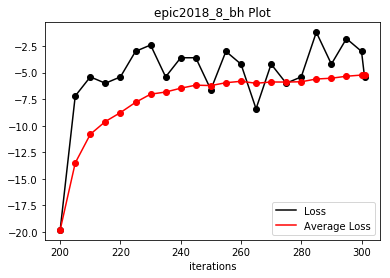

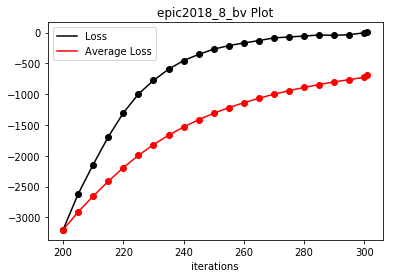

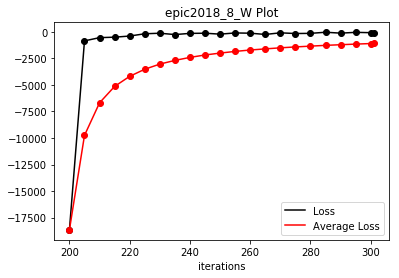

In [11]:
losses = model.loss(instance)
report.save_losses(losses,model.iters)

## Sampling

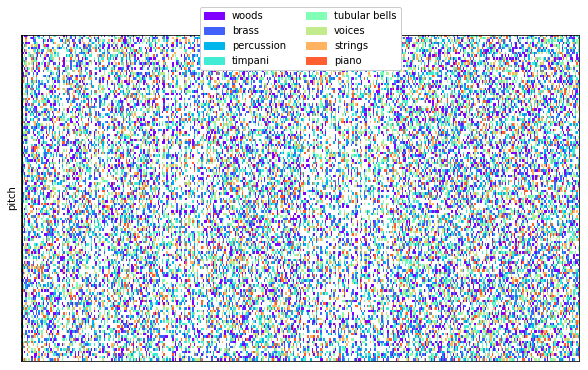

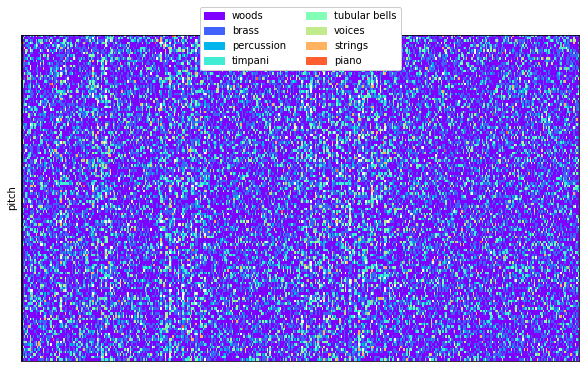

In [12]:
samples = model.sample(instance)
report.save_samples(samples,model.iters)

## Save Modeloid

In [13]:
model.save()
report.save_model(model.iters)

## Main

In [1]:
import main

In [2]:
main.main()

Tf map

In [1]:
import tensorflow as tf

/usr/local/Anaconda3-5.1.0-Linux-x86_64/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a = tf.placeholder(shape=(12,2),dtype=tf.int8)

In [3]:
a

<tf.Tensor 'Placeholder:0' shape=(12, 2) dtype=int8>

In [4]:
l = []
def redsum(a):
    r = tf.reduce_sum(a)

In [5]:
b = tf.map_fn(redsum,a)

ValueError: None values not supported.